In [1]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['hatch.color'] = 'w'

In [2]:
df = pd.read_csv('results/jmh_benchmark.csv').rename(columns = {'Param: keyTemplateString':'Cipher', 'Param: crdtSizeInElements':'CRDT Elements'})
df = df.fillna('N/A')
def shortenName(benchString):
    return benchString.replace('de.ckuessner.encrdt.benchmarks.AWLWWMapBenchmark.' , '')
df['Benchmark'] = df['Benchmark'].map(shortenName)
ciphers = df['Cipher'].unique().tolist()
df

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,CRDT Elements,Cipher
0,encryptOnly,avgt,1,15,0.002758,0.000072,ms/op,10,AES128_GCM
1,encryptOnly,avgt,1,15,0.003032,0.000083,ms/op,10,AES256_GCM
2,encryptOnly,avgt,1,15,0.003837,0.000117,ms/op,10,AES256_GCM_SIV
3,encryptOnly,avgt,1,15,0.032406,0.000884,ms/op,10,XCHACHA20_POLY1305
4,encryptOnly,avgt,1,15,0.016644,0.000270,ms/op,100,AES128_GCM
5,encryptOnly,avgt,1,15,0.018933,0.000334,ms/op,100,AES256_GCM
6,encryptOnly,avgt,1,15,0.021268,0.000634,ms/op,100,AES256_GCM_SIV
7,encryptOnly,avgt,1,15,0.304933,0.010424,ms/op,100,XCHACHA20_POLY1305
8,encryptOnly,avgt,1,15,0.145797,0.004501,ms/op,1000,AES128_GCM
9,encryptOnly,avgt,1,15,0.167617,0.004522,ms/op,1000,AES256_GCM


In [3]:
serializeOnlyVsEncryptOnly = df[df['Benchmark'].isin(['serializeOnly', 'encryptOnly'])].pivot(index='CRDT Elements', columns='Cipher', values='Score')
serializeOnlyVsEncryptOnly

Cipher,AES128_GCM,AES256_GCM,AES256_GCM_SIV,N/A,XCHACHA20_POLY1305
CRDT Elements,,,,,
10,0.002758,0.003032,0.003837,0.004847,0.032406
100,0.016644,0.018933,0.021268,0.054366,0.304933
1000,0.145797,0.167617,0.184749,0.682687,3.147415


In [4]:
encryptOnly = df[df['Benchmark'] == 'encryptOnly'][['Cipher', 'CRDT Elements', 'Score', 'Score Error (99.9%)']].rename(columns={'Score': 'Encryption Time', 'Score Error (99.9%)': 'Encryption Time Error (99.9%)'})
serializeOnly = df[df['Benchmark'] == 'serializeOnly'][['CRDT Elements', 'Score', 'Score Error (99.9%)']].rename(columns={'Score': 'Serialization Time', 'Score Error (99.9%)': 'Serialization Time Error (99.9%)'})
encryptAndSerialize = encryptOnly.merge(serializeOnly, left_on='CRDT Elements', right_on='CRDT Elements')
encryptAndSerialize

,Cipher,CRDT Elements,Encryption Time,Encryption Time Error (99.9%),Serialization Time,Serialization Time Error (99.9%)
0,AES128_GCM,10,0.002758,0.000072,0.004847,0.000230
1,AES256_GCM,10,0.003032,0.000083,0.004847,0.000230
2,AES256_GCM_SIV,10,0.003837,0.000117,0.004847,0.000230
3,XCHACHA20_POLY1305,10,0.032406,0.000884,0.004847,0.000230
4,AES128_GCM,100,0.016644,0.000270,0.054366,0.001746
5,AES256_GCM,100,0.018933,0.000334,0.054366,0.001746
6,AES256_GCM_SIV,100,0.021268,0.000634,0.054366,0.001746
7,XCHACHA20_POLY1305,100,0.304933,0.010424,0.054366,0.001746
8,AES128_GCM,1000,0.145797,0.004501,0.682687,0.021498
9,AES256_GCM,1000,0.167617,0.004522,0.682687,0.021498


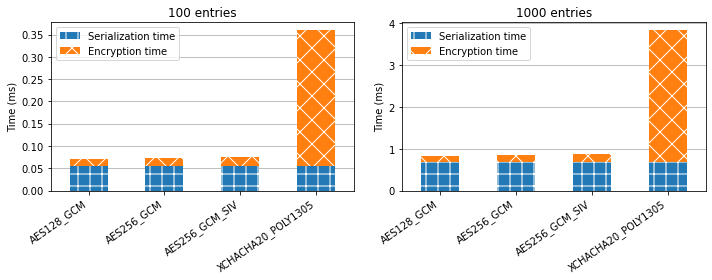

In [5]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

hatches = ('+'*4 + 'x'*4)
for ax, elems in [(ax1, 100),(ax2,1000)]:    
    encryptAndSerializeFiltered = encryptAndSerialize[encryptAndSerialize['CRDT Elements'] == elems].set_index('Cipher')
    encryptAndSerializeFiltered[['Serialization Time','Encryption Time']].plot.bar(stacked=True, ax=ax, alpha=.99)

    for bar, hatch in zip(ax.patches, hatches):
       bar.set_hatch(hatch)

    ax.legend(labels=['Serialization time', 'Encryption time'])

    ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')
    ax.set_title(f'{elems} entries')
    ax.set_ylabel('Time (ms)')
    ax.set_xlabel('')
    ax.set_axisbelow(True)
    ax.grid(axis='y')

plt.tight_layout()
plt.show()

In [6]:
state_df = pd.read_csv('./results/state_size_benchmark.csv')
# Convert bytes to KiB
state_df['untrustedReplicaSize'] = state_df['untrustedReplicaSize'].div(1024)
state_df['mergedSize'] = state_df['mergedSize'].div(1024)
state_df

,concurrentUpdates,commonElements,uniqueElements,untrustedReplicaSize,mergedSize
0,1,9999,10000,1704.221680,1704.158203
1,2,9998,10000,3408.630859,1704.274414
2,3,9997,10000,5113.127930,1704.357422
3,4,9996,10000,6817.625000,1704.410156


In [7]:
delta_df = pd.read_csv('./results/delta_state_size_benchmark.csv')
# Convert bytes to KiB
delta_df['untrustedReplicaSize'] = delta_df['untrustedReplicaSize'].div(1024)
delta_df['mergedSize'] = delta_df['mergedSize'].div(1024)
delta_df

,concurrentUpdates,commonElements,uniqueElements,untrustedReplicaSize,mergedSize
0,1,9999,10000,2729.552734,1704.107422
1,2,9998,10000,2729.546875,1704.101562
2,3,9997,10000,2729.541016,1704.095703
3,4,9996,10000,2729.535156,1704.089844


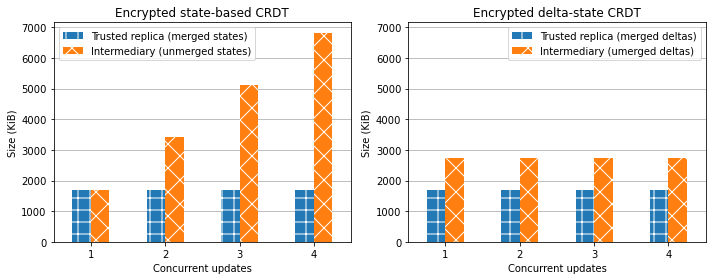

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))#,sharey=True)
uniqueElements = 10**4
xticks = [1,2,3,4]

state_concurrent_updates_df = state_df.query(f'uniqueElements == {uniqueElements}').set_index('concurrentUpdates')
# alpha=.99 required for hatch in pdf (https://stackoverflow.com/questions/5195466/matplotlib-does-not-display-hatching-when-rendering-to-pdf)
state_concurrent_updates_df.plot.bar(y=['mergedSize','untrustedReplicaSize'], ax=ax1, alpha=.99)

delta_concurrent_updates_df = delta_df.query(f'uniqueElements == {uniqueElements}').set_index('concurrentUpdates')
delta_concurrent_updates_df.plot.bar(y=['mergedSize', 'untrustedReplicaSize'], ax=ax2, alpha=.99)

hatches = ('+'*4 + 'x'*4)
for ax in [ax1,ax2]:
    for bar, hatch in zip(ax.patches, hatches):
       bar.set_hatch(hatch)

ax1.set_title('Encrypted state-based CRDT')
ax1.set_ylabel('Size (KiB)')
ax1.set_xlabel('Concurrent updates')
ax1.set_xticklabels(xticks, rotation=0)
ax1.legend(labels=['Trusted replica (merged states)', 'Intermediary (unmerged states)'])

ax2.set_title('Encrypted delta-state CRDT')
ax2.set_ylabel('Size (KiB)')
ax2.set_xlabel('Concurrent updates')
ax2.set_xticklabels(xticks, rotation=0)
ax2.legend(labels=['Trusted replica (merged deltas)', 'Intermediary (umerged deltas)'])
ax2.set_ylim(ax1.get_ylim())

plt.tight_layout()
ax1.grid(axis='y')
ax2.grid(axis='y')
ax1.set_axisbelow(True)
ax2.set_axisbelow(True)
plt.show()

In [9]:
delta_df_linear = pd.read_csv('./results/delta_state_size_benchmark_linear_sampling.csv')
# Convert bytes to KiB
delta_df_linear['untrustedReplicaSize'] = delta_df_linear['untrustedReplicaSize'].div(1024)
delta_df_linear['mergedSize'] = delta_df_linear['mergedSize'].div(1024)
delta_df_linear

,concurrentUpdates,commonElements,uniqueElements,untrustedReplicaSize,mergedSize
0,1,1000,1000,270.263672,168.845703
1,1,2000,2000,543.466797,339.509766
2,1,3000,3000,817.095703,510.439453
3,1,4000,4000,1090.238281,680.868164
4,1,5000,5000,1363.350586,851.441406
5,1,6000,6000,1636.653320,1021.875977
6,1,7000,7000,1909.849609,1192.533203
7,1,8000,8000,2182.998047,1363.142578
8,1,9000,9000,2456.646484,1533.728516
9,1,10000,10000,2729.582031,1704.124023


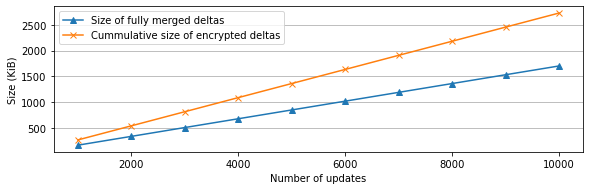

In [10]:
fig, ax = plt.subplots(figsize=(8.3,2.75))

query_df = delta_df_linear.query('concurrentUpdates == 1').set_index('uniqueElements')

query_df.plot.line(y='mergedSize', ax=ax, marker='^')
query_df.plot.line(y='untrustedReplicaSize', ax=ax, marker='x')
ax.set_ylabel('Size (KiB)')
ax.set_xlabel('Number of updates')
ax.legend(labels=['Size of fully merged deltas', 'Cummulative size of encrypted deltas'])
ax.grid(axis='y')
ax.set_axisbelow(True)

plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [11]:
delta_df_linear['untrustedReplicaSize']/delta_df_linear['mergedSize']

0    1.600655
1    1.600740
2    1.600769
3    1.601247
4    1.601227
5    1.601616
6    1.601506
7    1.601445
8    1.601748
9    1.601751
dtype: float64